<a href="https://colab.research.google.com/github/LiterallyRicky/DataScience-A2/blob/main/Rick_RiveU4Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Unit 4 Project: How do different brand names affect laptop prices?**#


---

Ever wanted to know if a specific type of brand affects price?


Using a dataset containing laptop prices, I'll be finding how brand names affect laptop prices!

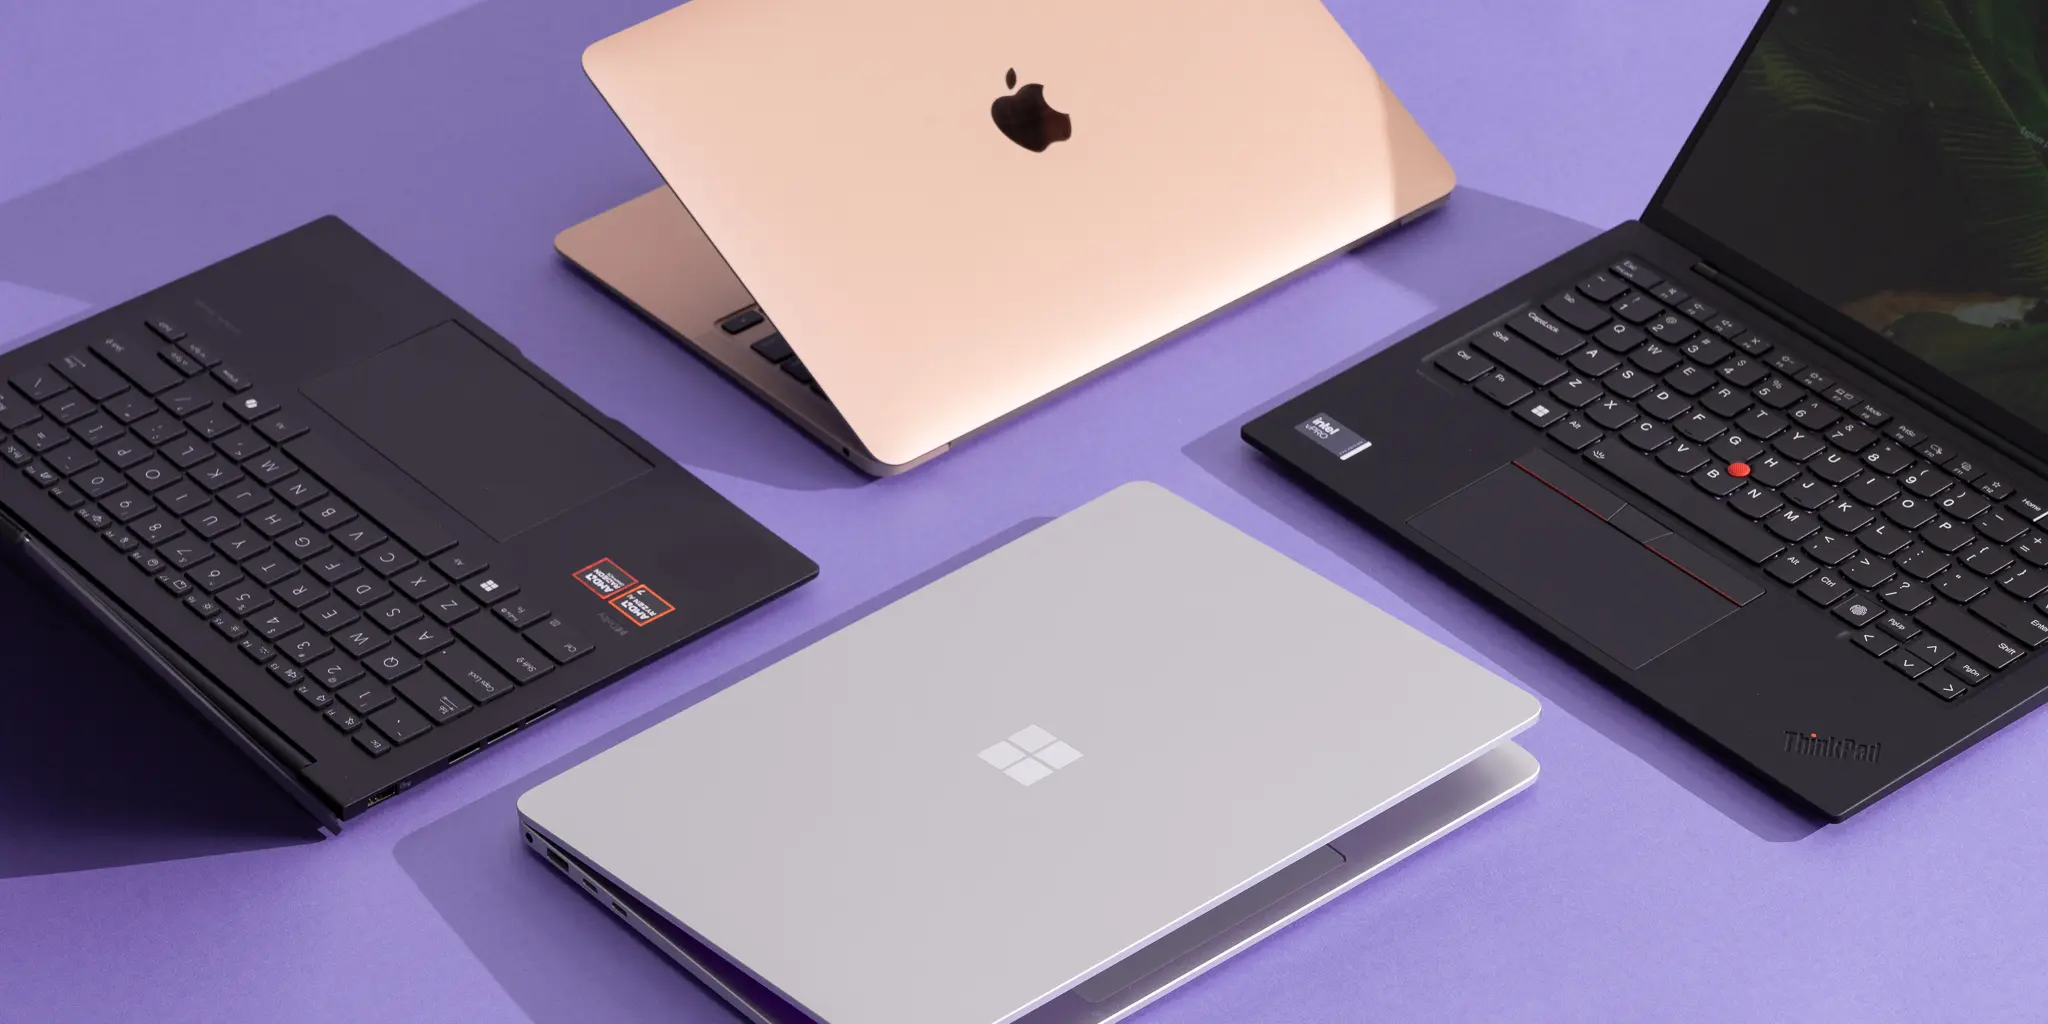

#**Context:**#

As I thought of a dataset for this project, I knew that the dataset I've already used in my [Unit 3 Project](https://github.com/LiterallyRicky/DataScience-A2/blob/main/Rick_RiveU3proj.ipynb), the 'Laptop Price' dataset, could be usable for the point of this project. As there's so many subcategories, I wanted to choose a subgroup that may affect laptop prices. Also, with the enjoyment I take away from laptops and with technology, I wanted to use a dataset and make a question with laptops.



With this, I came up with the question for this project and I thought it would be interesting to see if there's dependency according with brand and price.


#**Importing Libraries:**#

Like usual, we have to import the libraries before diving into the actual model creation.

In [51]:
#all libraries imported
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import pymc as pm

Yay.

#**Plotting the Dataset: Visualization**#

To showcase what I'm looking at in the dataset, I'll be plotting the dataset in it's entirety.

Also, if you wanted to know where I got this dataset from, I'll be linking the actual link to the Kaggle dataset: [Laptop Price Dataset](https://www.kaggle.com/datasets/abdelrahmanemad594/laptop-prices)

In [52]:
#loading the dataset from Github, dataset from Kaggle
url_laptops = 'https://raw.githubusercontent.com/LiterallyRicky/DataScience-A2/refs/heads/main/Data/Laptop-Price.csv'
#Reads the csv file
data_laptops = pd.read_csv(url_laptops,dtype={'Company':'category'})

In [53]:
#Models the entirety of the dataset of laptops (1146 laptops)
data_laptops

Company                                    Product            TypeName  \
0         HP                                     250 G6            Notebook   
1       Acer                                   Aspire 3            Notebook   
2       Asus                            ZenBook UX430UN           Ultrabook   
3       Acer                                    Swift 3           Ultrabook   
4         HP                                     250 G6            Notebook   
...      ...                                        ...                 ...   
1141    Dell                              Inspiron 3567            Notebook   
1142    Asus  X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce            Notebook   
1143  Lenovo                             Yoga 500-14ISK  2 in 1 Convertible   
1144  Lenovo                             Yoga 900-13ISK  2 in 1 Convertible   
1145      HP        15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook   

      Inches                            ScreenResolution   Ram       OpSys  \
0       15.6                           Full HD 1920x1080   8GB       No OS   
1       15.6                                    1366x768   4GB  Windows 10   
2       14.0                           Full HD 1920x1080  16GB  Windows 10   
3       14.0                 IPS Panel Full HD 1920x1080   8GB  Windows 10   
4       15.6                                    1366x768   4GB       No OS   
...      ...                                         ...   ...         ...   
1141    15.6                                    1366x768   8GB       Linux   
1142    15.6                                    1366x768   4GB  Windows 10   
1143    14.0   IPS Panel Full HD / Touchscreen 1920x1080   4GB  Windows 10   
1144    13.3  IPS Panel Quad HD+ / Touchscreen 3200x1800  16GB  Windows 10   
1145    15.6                                    1366x768   6GB  Windows 10   

     Cpu Brand       Cpu Model Cpu Rate  SSD  HDD  Flash Storage  Hybrid  \
0        Intel   Core i5 7200U   2.5GHz  256    0              0       0   
1          AMD  A9-Series 9420     3GHz    0  500              0       0   
2        Intel   Core i7 8550U   1.8GHz  512    0              0       0   
3        Intel   Core i5 8250U   1.6GHz  256    0              0       0   
4        Intel   Core i5 7200U   2.5GHz    0  500              0       0   
...        ...             ...      ...  ...  ...            ...     ...   
1141     Intel   Core i7 7500U   2.7GHz    0    1              0       0   
1142     Intel   Core i7 6500U   2.5GHz    0  500              0       0   
1143     Intel   Core i7 6500U   2.5GHz  128    0              0       0   
1144     Intel   Core i7 6500U   2.5GHz  512    0              0       0   
1145     Intel   Core i7 6500U   2.5GHz    0    1              0       0   

     Gpu Brand         Gpu Model  Unnamed: 16  Price_euros  
0        Intel   HD Graphics 620          NaN       575.00  
1          AMD         Radeon R5          NaN       400.00  
2       Nvidia     GeForce MX150          NaN      1495.00  
3        Intel  UHD Graphics 620          NaN       770.00  
4        Intel   HD Graphics 620          NaN       393.90  
...        ...               ...          ...          ...  
1141       AMD    Radeon R5 M430          NaN       805.99  
1142    Nvidia      GeForce 920M          NaN       720.32  
1143     Intel   HD Graphics 520          NaN       638.00  
1144     Intel   HD Graphics 520          NaN      1499.00  
1145       AMD    Radeon R5 M330          NaN       764.00  

[1146 rows x 18 columns]

So with this, you can see that there are many subgroups without this dataset that may affect price. It's a lot of possibilites with this one but I think the most interesting may be company names (HP, Dell, Lenovo, eg.,) affecting price which can contain dependency.

Nice, now that we have this, we can continue with making our model!

#**Creating the Hierarchial Models:**#

**Model 1:**



---



Setting up the neccessities before making the actual model(s).

In [54]:
idx = data_laptops.Company.cat.codes.values
coords = {"Company": data_laptops.Company.cat.categories}

Now we can make our first model. For this model, we're going to making a model that includes all categories in Companies. Meaning that this model will not have any change to it and not any brands removed YET. Following, we're going to exclude some brands to see what happens :D.

In [55]:
with pm.Model(coords=coords) as laptop_price_model:

    #Hyperpriors for the means and standard deviations across companies
    μ_mean = pm.Normal('μ_mean', mu=1000, sigma=500)
    μ_sd = pm.HalfNormal('μ_sd', sigma=300)

    σ_mean = pm.Normal('σ_mean', mu=300, sigma=100)
    σ_sd = pm.HalfNormal('σ_sd', sigma=100)

    #priors for mean and standard deviation
    mu = pm.Normal('mu', mu=μ_mean, sigma=μ_sd, dims="Company")
    σ = pm.HalfNormal('σ', sigma=σ_sd, dims="Company")

    # Likelihood
    y = pm.Normal(
        'y',
        mu=mu[idx],
        sigma=σ[idx],
        observed=data_laptops['Price_euros'].values
    )

    # Sampling
    idata_laptops1 = pm.sample(target_accept=0.95)

Output()

Output()

ERROR:pymc.stats.convergence:There were 44 divergences after tuning. Increase `target_accept` or reparameterize.


Now you may be wondering, "why Normal Distributions (Normal + HalfNormal) for prices?". Well, prices are continous and the normal distribution is well-suited for modeling continous data as we have. With the HalfNormal distributions, the supports are only positive which fits our data, as we don't have any negatives. Both are extremely great for modeling our data!

Mostly the mu and sigma values are just assumptions that I made and constructed to fit the idea of differing laptop prices.

Let's plot the 'plot trace' model now. This is going to take long. :(

array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'μ_mean'}>,
        <Axes: title={'center': 'μ_mean'}>],
       [<Axes: title={'center': 'μ_sd'}>,
        <Axes: title={'center': 'μ_sd'}>],
       [<Axes: title={'center': 'σ'}>, <Axes: title={'center': 'σ'}>],
       [<Axes: title={'center': 'σ_mean'}>,
        <Axes: title={'center': 'σ_mean'}>],
       [<Axes: title={'center': 'σ_sd'}>,
        <Axes: title={'center': 'σ_sd'}>]], dtype=object)

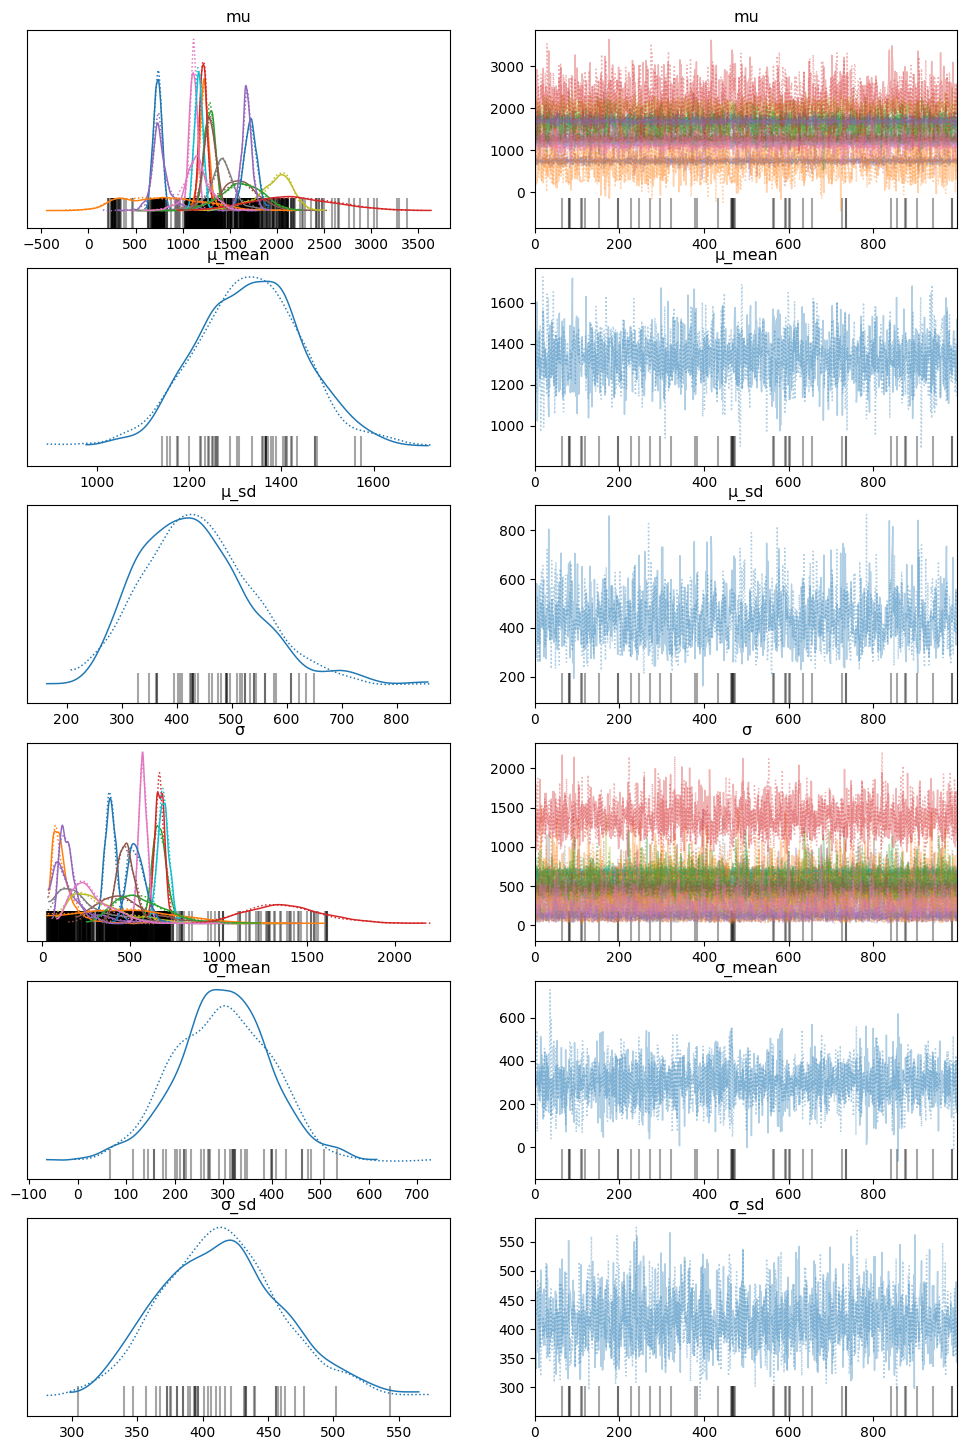

In [56]:
az.plot_trace(idata_laptops1, figsize=(12, 18))

So, unfortunately with this model, there's multiple divergences (44), which screws up the data and the plot trace as well. So continuing, we need to elimate this. However, the plot trace isn't terrible, but could be better!

In [57]:
az.rhat(idata_laptops1)

<xarray.Dataset> Size: 916B
Dimensions:  (Company: 17)
Coordinates:
  * Company  (Company) <U9 612B 'Acer' 'Apple' 'Asus' ... 'Toshiba' 'Xiaomi'
Data variables:
    mu       (Company) float64 136B 1.002 1.002 1.0 1.001 ... 1.0 1.002 1.002
    μ_mean   float64 8B 1.001
    μ_sd     float64 8B 0.9996
    σ        (Company) float64 136B 1.001 1.005 1.001 0.9998 ... 1.001 1.0 1.002
    σ_mean   float64 8B 1.004
    σ_sd     float64 8B 1.003

Honestly, the rhat values are definitely better than I thought! It's around the range we need the values to be. Most importantly, the values aren't over 1.1 which then if it was, it would be considered bad.

array([<Axes: >], dtype=object)

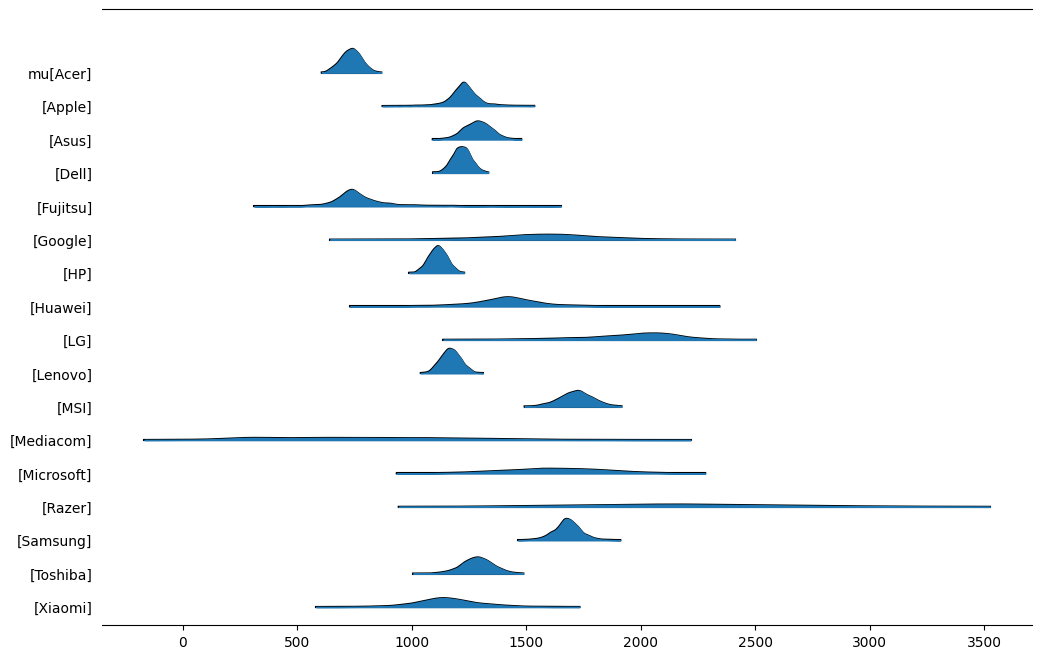

In [58]:
# plots a 99.8% HDI for the positions shooting percentage means
az.plot_forest(idata_laptops1, var_names=['mu'], combined=True, figsize=(12, 8), kind = 'ridgeplot', hdi_prob=0.998)

The graph above details the means for each brand name. I really like this graph, as you can see how each brand contributes to the true price average. This gives us great information on the individual companies.

Output()

<Axes: xlabel='y'>

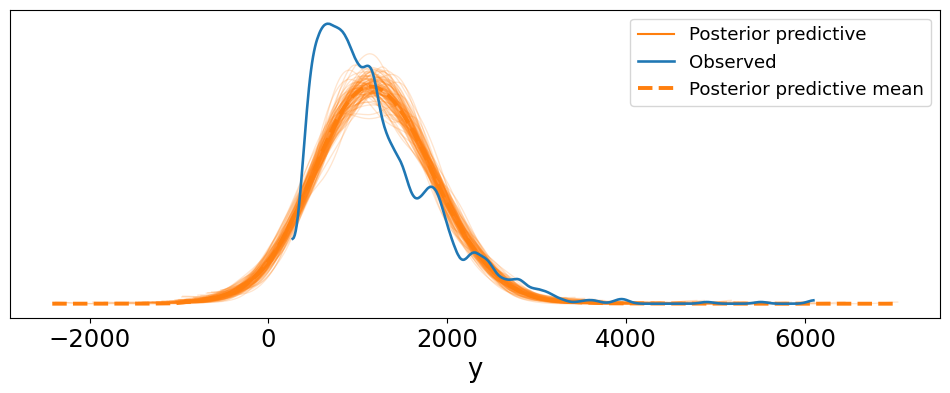

In [59]:
pm.sample_posterior_predictive(idata_laptops1, model = laptop_price_model, extend_inferencedata=True)
az.plot_ppc(idata_laptops1, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Woah, so this is something I didn't know but I should've realized it beforehand. In my Unit 3 Project, I did something similar with prices but with the question: "What is the true average laptop price?". The PPC model is exactly the same -- same shape and same peak. I really thought that this was interesting! It makes sense though, using the same prices from the same dataset is bound for this to happen.

Okay but a little bit describing this graph: It's pretty bad. The mismatch between actually capturing reality is rough and could suggest that the model struggled to account for the variation in prices across all brands.

**Model 2 (excluding brands):**



---



First I want to see what brand names are in my dataset without having to scroll and note all of them down. The following code with print out all the company/brand names in the dataset.

In [60]:
# This code just prints out the brand names
brand_names = data_laptops['Company'].unique()

# Prints the list of brand names
print(brand_names)

['HP', 'Acer', 'Asus', 'Dell', 'Lenovo', ..., 'Fujitsu', 'Samsung', 'LG', 'Mediacom', 'Apple']
Length: 17
Categories (17, object): ['Acer', 'Apple', 'Asus', 'Dell', ..., 'Razer', 'Samsung', 'Toshiba',
                          'Xiaomi']


**The code below is a bit more complicated and I had to research some of this. Basically, this code creates a bar graph showcasing the number of laptops per brand.**

<ipython-input-61-af350211a94d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')


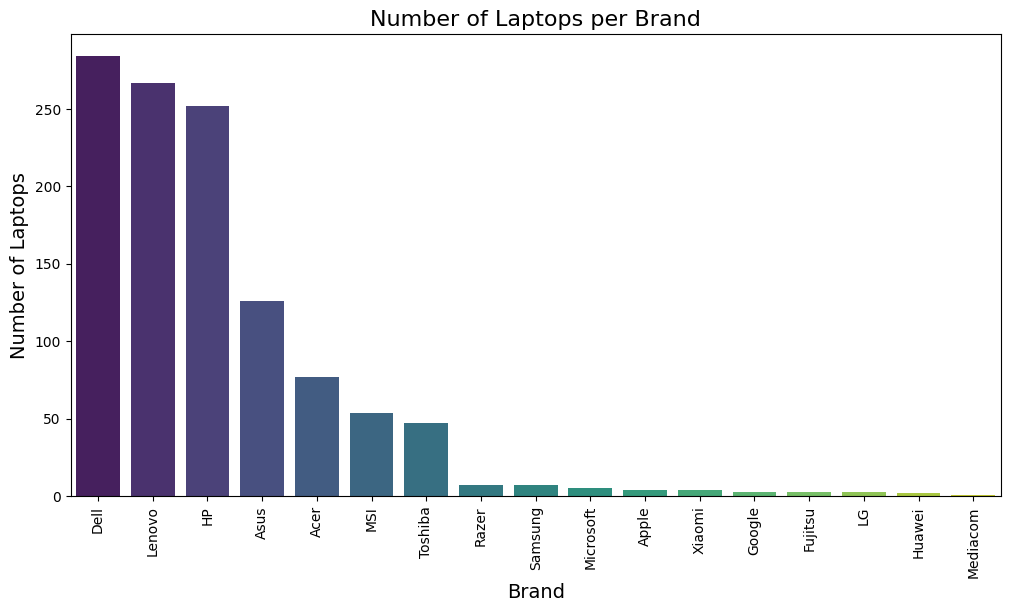

In [61]:
data_laptops = pd.read_csv(url_laptops)

# Get the count of each brand (Company) in the dataset
brand_counts = data_laptops['Company'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')

# this was nice to do and customize the graph
plt.title('Number of Laptops per Brand', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Number of Laptops', fontsize=14)
plt.xticks(rotation=90)  # Rotate brand names for better visibility

# plotting
plt.show()

Amazing, I didn't know Fujitsu was a company name.

Anyways, let's remove 4 of the companies (HP, Lenovo, Fujitsu, Dell) in this following model. Why? I just think it would be interesting to see how it compared to the previous model, especially since Dell, Lenovo, and HP are the brands with the most laptops in the dataset. Will it fit better? Will it be worse? Let's check it out.

In [62]:
data_laptops = pd.read_csv(url_laptops, dtype={'Company': 'category'})
data_laptops = data_laptops[~data_laptops.Company.isin(['HP', 'Lenovo', 'Fujitsu', 'Dell'])]

# Remove unused categories if necessary
data_laptops.Company = data_laptops.Company.cat.remove_unused_categories()

# copied and pasted from aboce
idx = data_laptops.Company.cat.codes.values
coords = {"Company": data_laptops.Company.cat.categories}

# Prints out the brand names that are used in the model
print(data_laptops['Company'].cat.categories)

Index(['Acer', 'Apple', 'Asus', 'Google', 'Huawei', 'LG', 'MSI', 'Mediacom',
       'Microsoft', 'Razer', 'Samsung', 'Toshiba', 'Xiaomi'],
      dtype='object')


In [63]:
with pm.Model(coords=coords) as laptop_price_model2:

    #Hyperpriors for the means and standard deviations across companies
    μ_mean = pm.Normal('μ_mean', mu=1000, sigma=500)
    #changing sigma to 650 to fit my last DS project
    μ_sd = pm.HalfNormal('μ_sd', sigma=650)

    σ_mean = pm.Normal('σ_mean', mu=300, sigma=100)
    σ_sd = pm.HalfNormal('σ_sd', sigma=100)

    # Company-specific priors for mean and standard deviation
    mu = pm.Normal('mu', mu=μ_mean, sigma=μ_sd, dims="Company")
    σ = pm.HalfNormal('σ', sigma=σ_sd, dims="Company")

    # Likelihood
    y = pm.Normal(
        'y',
        mu=mu[idx],
        sigma=σ[idx],
        observed=data_laptops['Price_euros'].values
    )

    # Sampling with increased target_accept
    idata_laptops2 = pm.sample(target_accept=0.99)

Output()

Output()

ERROR:pymc.stats.convergence:There were 15 divergences after tuning. Increase `target_accept` or reparameterize.


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'μ_mean'}>,
        <Axes: title={'center': 'μ_mean'}>],
       [<Axes: title={'center': 'μ_sd'}>,
        <Axes: title={'center': 'μ_sd'}>],
       [<Axes: title={'center': 'σ'}>, <Axes: title={'center': 'σ'}>],
       [<Axes: title={'center': 'σ_mean'}>,
        <Axes: title={'center': 'σ_mean'}>],
       [<Axes: title={'center': 'σ_sd'}>,
        <Axes: title={'center': 'σ_sd'}>]], dtype=object)

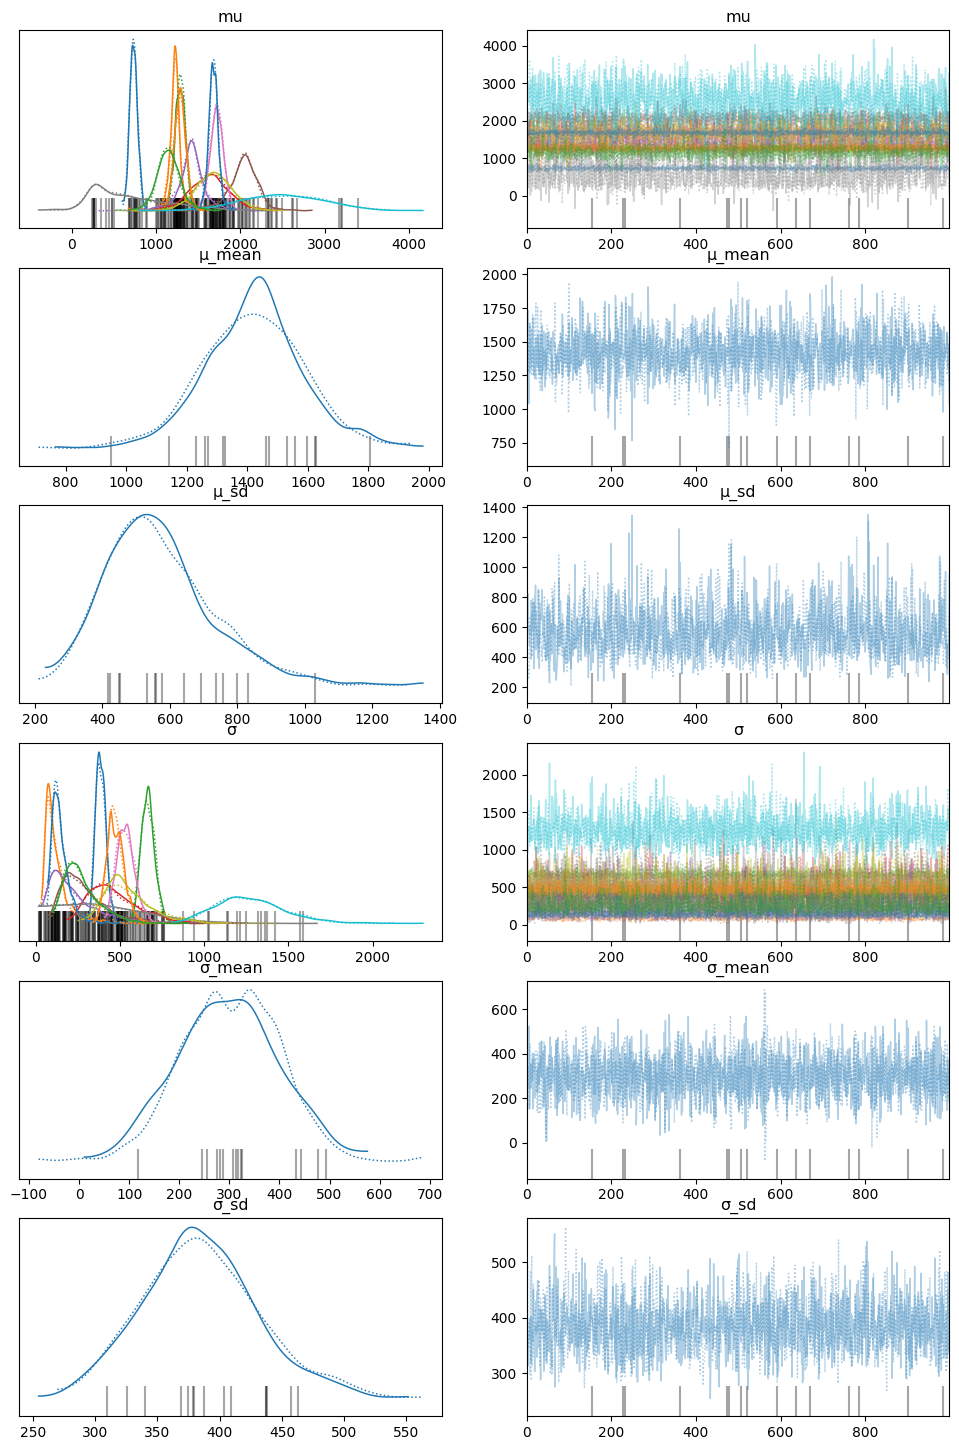

In [64]:
az.plot_trace(idata_laptops2, figsize=(12, 18))

I would consider this plot trace to be better than the previous model. With lower divergences (15 this time), the plot trace seems to run the model smoother than the previous model.

In [65]:
az.rhat(idata_laptops2)

<xarray.Dataset> Size: 708B
Dimensions:  (Company: 13)
Coordinates:
  * Company  (Company) <U9 468B 'Acer' 'Apple' 'Asus' ... 'Toshiba' 'Xiaomi'
Data variables:
    mu       (Company) float64 104B 1.002 1.001 1.003 1.003 ... 1.0 0.9995 0.999
    μ_mean   float64 8B 1.002
    μ_sd     float64 8B 0.9997
    σ        (Company) float64 104B 1.002 1.0 1.0 1.0 ... 0.9996 1.002 0.9992
    σ_mean   float64 8B 0.9998
    σ_sd     float64 8B 1.001

Again, these rhat values are excellent, there's no values that go over 1.1 and actually most values are super close to 1. With good convergence like this, reasonable and reliable inference is bound to be present. This also means that the hyperpriors and the priors are used well for the data, which makes sense considering my data is good for Normal + HalfNormal. Overall, pretty good.

Output()

(200.0, 6710.0)

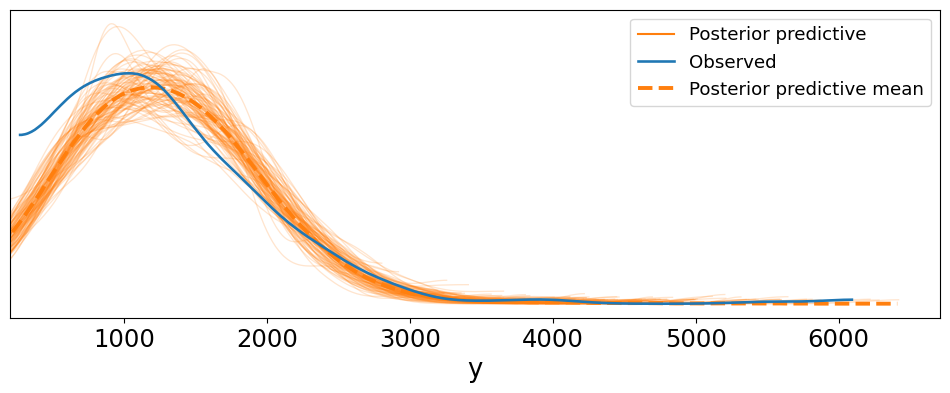

In [66]:
pm.sample_posterior_predictive(idata_laptops2, model = laptop_price_model2, extend_inferencedata=True)
ax = az.plot_ppc(idata_laptops2, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
#setting limits to constrain to only positive values
ax.set_xlim(200, 6710)

Interesting, so the PPC is way better than the first model.

*What could this suggest about the data?*

Well, I think it primarily says that after removing the top 3 brands, it may indicate that excluding these brands reduced some of the complexity that was hard for the model to capture. It could also be suggested that these brands may have had influential data points in our dataset.

**Model 3 (excluding more brands + SkewNormal Likelihood):**







---

Okay so to confirm my suspicion, I want to model what would happen if I were to exclude the top 5 brands in the dataset. Again, I'm interested if this will mess up the PPC model in all together or if it'll make it better.

For this model, I'd like to change the likelihood to SkewNormal since it matches the previous model PPC shape. Maybe it'll fit better as well?

In [67]:
data_laptops = pd.read_csv(url_laptops, dtype={'Company': 'category'})
data_laptops = data_laptops[~data_laptops.Company.isin(['HP', 'Lenovo', 'Asus', 'Dell', 'Acer'])]

# Remove unused categories if necessary
data_laptops.Company = data_laptops.Company.cat.remove_unused_categories()

# copied and pasted from aboce
idx = data_laptops.Company.cat.codes.values
coords = {"Company": data_laptops.Company.cat.categories}

# Prints out the brand names that are used in the model
print(data_laptops['Company'].cat.categories)

Index(['Apple', 'Fujitsu', 'Google', 'Huawei', 'LG', 'MSI', 'Mediacom',
       'Microsoft', 'Razer', 'Samsung', 'Toshiba', 'Xiaomi'],
      dtype='object')


In [68]:
with pm.Model(coords=coords) as laptop_price_model3:

    #Hyperpriors for the means and standard deviations across companies
    μ_mean = pm.Normal('μ_mean', mu=1000, sigma=500)
    #changing sigma to 650 to fit my last DS project
    μ_sd = pm.HalfNormal('μ_sd', sigma=650)

    σ_mean = pm.Normal('σ_mean', mu=300, sigma=100)
    σ_sd = pm.HalfNormal('σ_sd', sigma=100)

    # Company-specific priors for mean and standard deviation
    mu = pm.Normal('mu', mu=μ_mean, sigma=μ_sd, dims="Company")
    σ = pm.HalfNormal('σ', sigma=σ_sd, dims="Company")

    # Likelihood
    y = pm.SkewNormal(
        'y',
        mu=mu[idx],
        sigma=σ[idx],
        observed=data_laptops['Price_euros'].values
    )

    # Sampling with increased target_accept
    idata_laptops3 = pm.sample(target_accept=0.99)

Output()

Output()

ERROR:pymc.stats.convergence:There were 13 divergences after tuning. Increase `target_accept` or reparameterize.


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'μ_mean'}>,
        <Axes: title={'center': 'μ_mean'}>],
       [<Axes: title={'center': 'μ_sd'}>,
        <Axes: title={'center': 'μ_sd'}>],
       [<Axes: title={'center': 'σ'}>, <Axes: title={'center': 'σ'}>],
       [<Axes: title={'center': 'σ_mean'}>,
        <Axes: title={'center': 'σ_mean'}>],
       [<Axes: title={'center': 'σ_sd'}>,
        <Axes: title={'center': 'σ_sd'}>]], dtype=object)

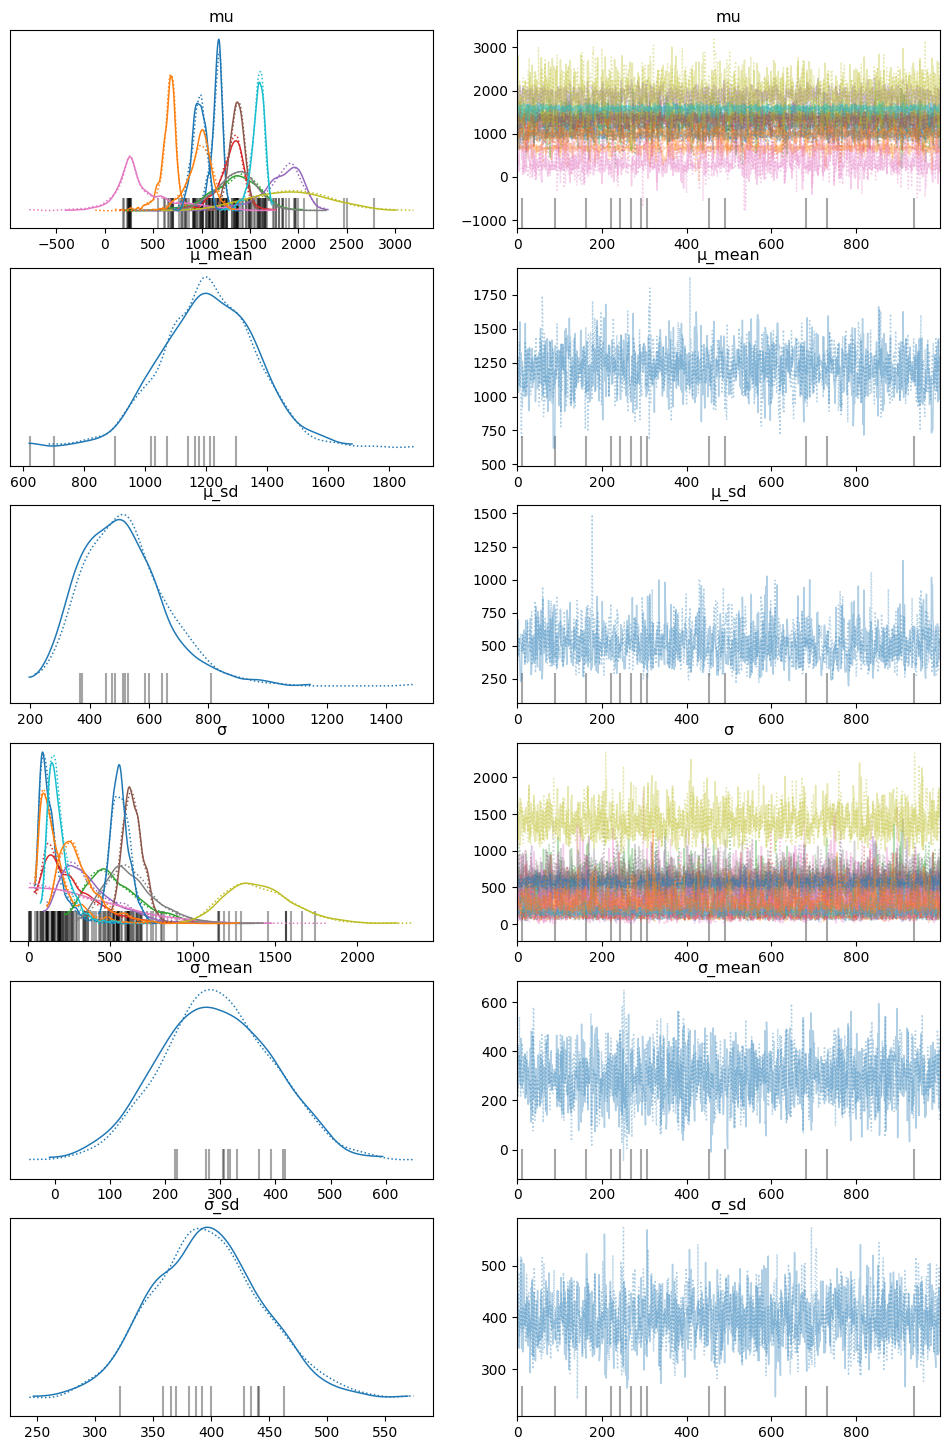

In [69]:
az.plot_trace(idata_laptops3, figsize=(12, 18))

Okay so this is great. The plot trace ran faster and it visually looks pretty good since there's barely any divergences now (13 only).

In [70]:
az.rhat(idata_laptops3)

<xarray.Dataset> Size: 656B
Dimensions:  (Company: 12)
Coordinates:
  * Company  (Company) <U9 432B 'Apple' 'Fujitsu' ... 'Toshiba' 'Xiaomi'
Data variables:
    mu       (Company) float64 96B 1.002 0.9999 1.001 ... 1.001 1.001 1.004
    μ_mean   float64 8B 0.9995
    μ_sd     float64 8B 1.005
    σ        (Company) float64 96B 1.001 1.002 1.002 1.0 ... 1.004 1.002 0.9994
    σ_mean   float64 8B 1.0
    σ_sd     float64 8B 0.9995

Again, if I comment on this, I'd be saying the same thing. The rhat values are pretty good!

Output()

(200.0, 6710.0)

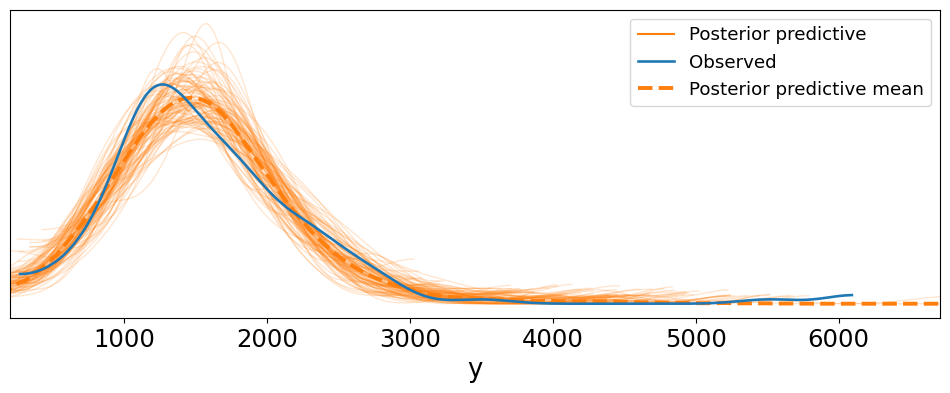

In [71]:
pm.sample_posterior_predictive(idata_laptops3, model = laptop_price_model3, extend_inferencedata=True)
ax = az.plot_ppc(idata_laptops3, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
#setting limits to constrain to only positive values
ax.set_xlim(200, 6710)

Now, we can see that the graph (the observed) is matching the model pretty well now. I'd like to say that this is the best graph that I have but again, I'm not sure -- the peak could be better, and I feel like this would be the main criteria I would comment on at the moment. I can see that changing the likelihood may have helped as well!


Next, I'd like to see what'd happen if I were to exclude some of the fewer brands in the dataset.

**Model 4 (excluding the fewer brands + SkewNormal Likelihood):**


---



In [77]:
data_laptops = pd.read_csv(url_laptops, dtype={'Company': 'category'})
data_laptops = data_laptops[~data_laptops.Company.isin(['Samsung', 'Razer', 'Microsoft', 'Apple', 'Google', 'LG'])]
# exluding brands that have fewer number of laptops
# Remove unused categories if necessary
data_laptops.Company = data_laptops.Company.cat.remove_unused_categories()

# copied and pasted from aboce
idx = data_laptops.Company.cat.codes.values
coords = {"Company": data_laptops.Company.cat.categories}

# Prints out the brand names that are used in the model
print(data_laptops['Company'].cat.categories)

Index(['Acer', 'Asus', 'Dell', 'Fujitsu', 'HP', 'Huawei', 'Lenovo', 'MSI',
       'Mediacom', 'Toshiba', 'Xiaomi'],
      dtype='object')


In [78]:
with pm.Model(coords=coords) as laptop_price_model4:

    #Hyperpriors for the means and standard deviations across companies
    #changing mu = 1200 (fitting mean from last DS project)
    μ_mean = pm.Normal('μ_mean', mu=1200, sigma=500)
    #changing sigma to 650 to fit my last DS project
    μ_sd = pm.HalfNormal('μ_sd', sigma=650)

    σ_mean = pm.Normal('σ_mean', mu=300, sigma=100)
    σ_sd = pm.HalfNormal('σ_sd', sigma=100)

    # Company-specific priors for mean and standard deviation
    mu = pm.Normal('mu', mu=μ_mean, sigma=μ_sd, dims="Company")
    σ = pm.HalfNormal('σ', sigma=σ_sd, dims="Company")

    # Likelihood
    y = pm.SkewNormal(
        'y',
        mu=mu[idx],
        sigma=σ[idx],
        observed=data_laptops['Price_euros'].values
    )

    # Sampling with increased target_accept
    idata_laptops4 = pm.sample(target_accept=0.99)

Output()

Output()

ERROR:pymc.stats.convergence:There were 20 divergences after tuning. Increase `target_accept` or reparameterize.


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'μ_mean'}>,
        <Axes: title={'center': 'μ_mean'}>],
       [<Axes: title={'center': 'μ_sd'}>,
        <Axes: title={'center': 'μ_sd'}>],
       [<Axes: title={'center': 'σ'}>, <Axes: title={'center': 'σ'}>],
       [<Axes: title={'center': 'σ_mean'}>,
        <Axes: title={'center': 'σ_mean'}>],
       [<Axes: title={'center': 'σ_sd'}>,
        <Axes: title={'center': 'σ_sd'}>]], dtype=object)

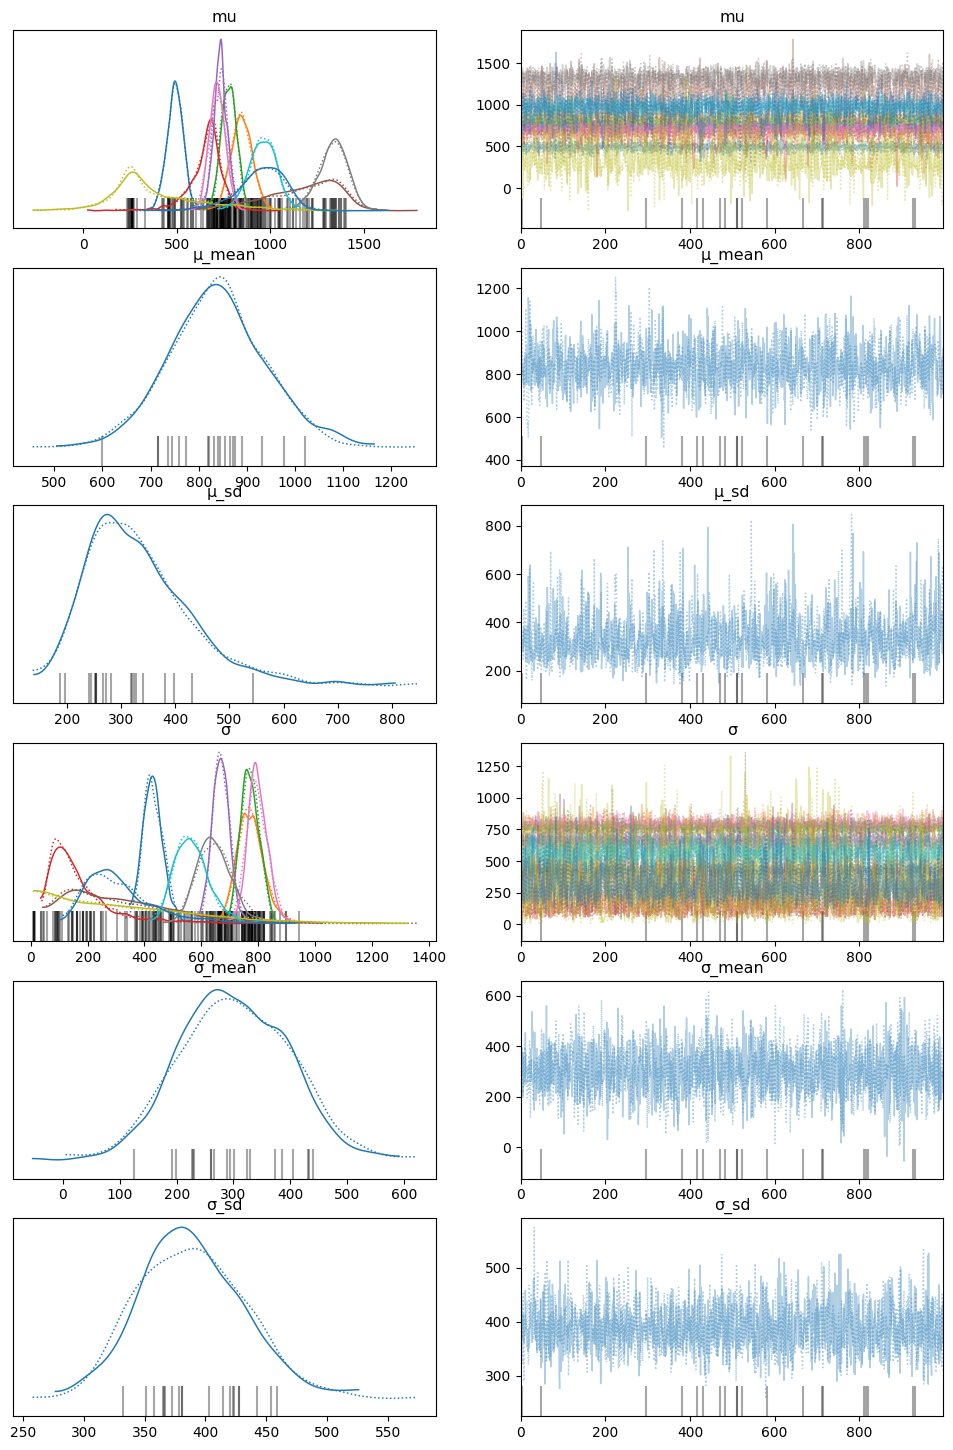

In [79]:
az.plot_trace(idata_laptops4, figsize=(12, 18))

In [80]:
az.rhat(idata_laptops4)

<xarray.Dataset> Size: 560B
Dimensions:  (Company: 11)
Coordinates:
  * Company  (Company) <U8 352B 'Acer' 'Asus' 'Dell' ... 'Toshiba' 'Xiaomi'
Data variables:
    mu       (Company) float64 88B 1.001 1.001 0.9996 ... 1.002 0.9997 1.004
    μ_mean   float64 8B 0.9998
    μ_sd     float64 8B 1.004
    σ        (Company) float64 88B 1.001 1.002 1.003 0.9995 ... 1.0 1.0 1.004
    σ_mean   float64 8B 1.0
    σ_sd     float64 8B 1.005

Nice, both plots are great (rhat + plot trace)!

Output()

(200.0, 6710.0)

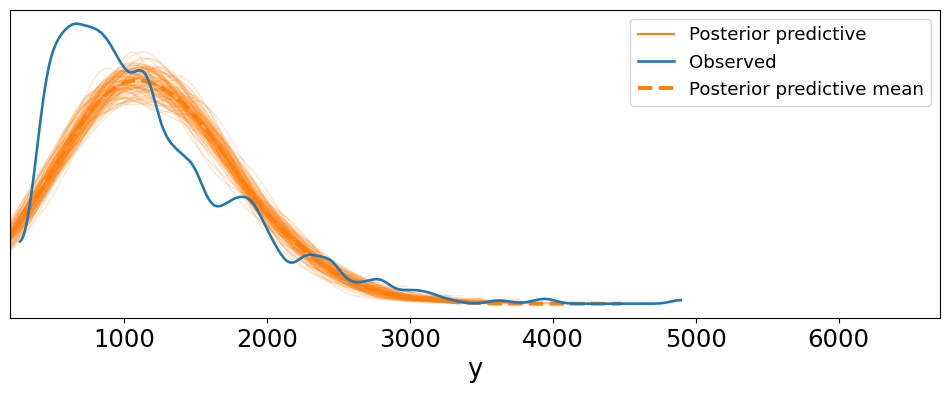

In [81]:
pm.sample_posterior_predictive(idata_laptops4, model = laptop_price_model4, extend_inferencedata=True)
ax = az.plot_ppc(idata_laptops4, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
#setting limits to constrain to only positive values
ax.set_xlim(200, 6710)

Okay with this, I understand the data a bit better and confirms some inferences. Since the observed line is super similar to the observed line when we plotted the model without excluding brands, we can conclude that the values affected the dataset are mainly the brands that are more common in the dataset. The influencential data points are all in the bigger brands.

**Some Final Comments:**


---



So, interestingly, the shapes were pretty similar to the model's "observed shape," where the distributions seem to be right-skewed. If we were to define one to be the "best" to represent reality with the PPC, I would have to decide that **Model 3's PPC** is the best PPC.

Output()

(200.0, 6710.0)

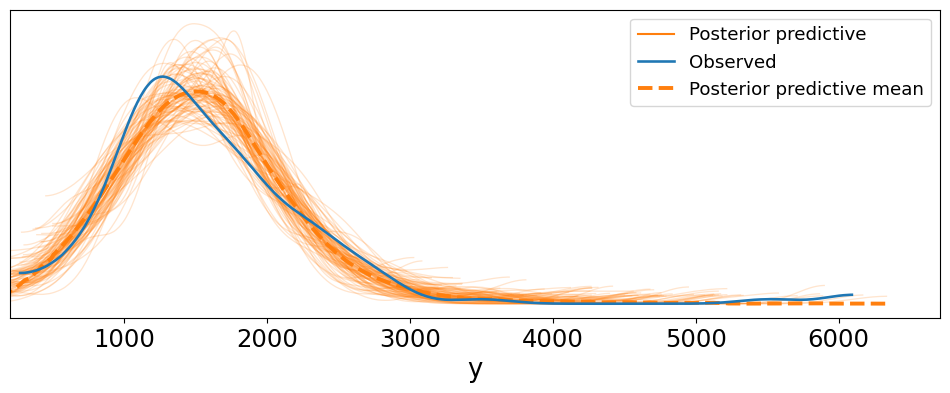

In [82]:
pm.sample_posterior_predictive(idata_laptops3, model = laptop_price_model3, extend_inferencedata=True)
ax = az.plot_ppc(idata_laptops3, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
#setting limits to constrain to only positive values
ax.set_xlim(200, 6710)

However, the rhat values and the plot traces are all really good and surprisingly well. I've said this before, but I'll say it again, the one thing that surprised me was the rhat values. Most would be at least over 1.1 but all of them were in reason and super close to 1.

In this case, I can't decide on a model that showcases this better than others.

Taking away from this project, I can see that the brand names that have the highest number of laptops influence the distributions to mismatch the posterior prediction mean a bit, but when excluded the observed fits better. This makes sense as the brands with the highest number of laptops are bound to affect the average price a bit with influencial points of data.
